5. Hi, Hydrogen! 0 points

Welcome to the QHack 2023 daily challenges! Every day for the next four days, you will receive two new challenges to complete. These challenges are worth no points — they are specifically designed to get your brain active and into the right mindset for the competition. You will also learn about various aspects of PennyLane that are essential to quantum computing, quantum machine learning, and quantum chemistry. Have fun!

Tutorial #5 — Hi, Hydrogen!

The Variational Quantum Eigensolver (VQE) algorithm has been touted as a game-changing near-term quantum algorithm. In particular, VQE is able to efficiently simulate low-energy properties of small molecules. In this challenge, you will calculate the energy of the hydrogen molecule for various molecular charges and bond length combinations.
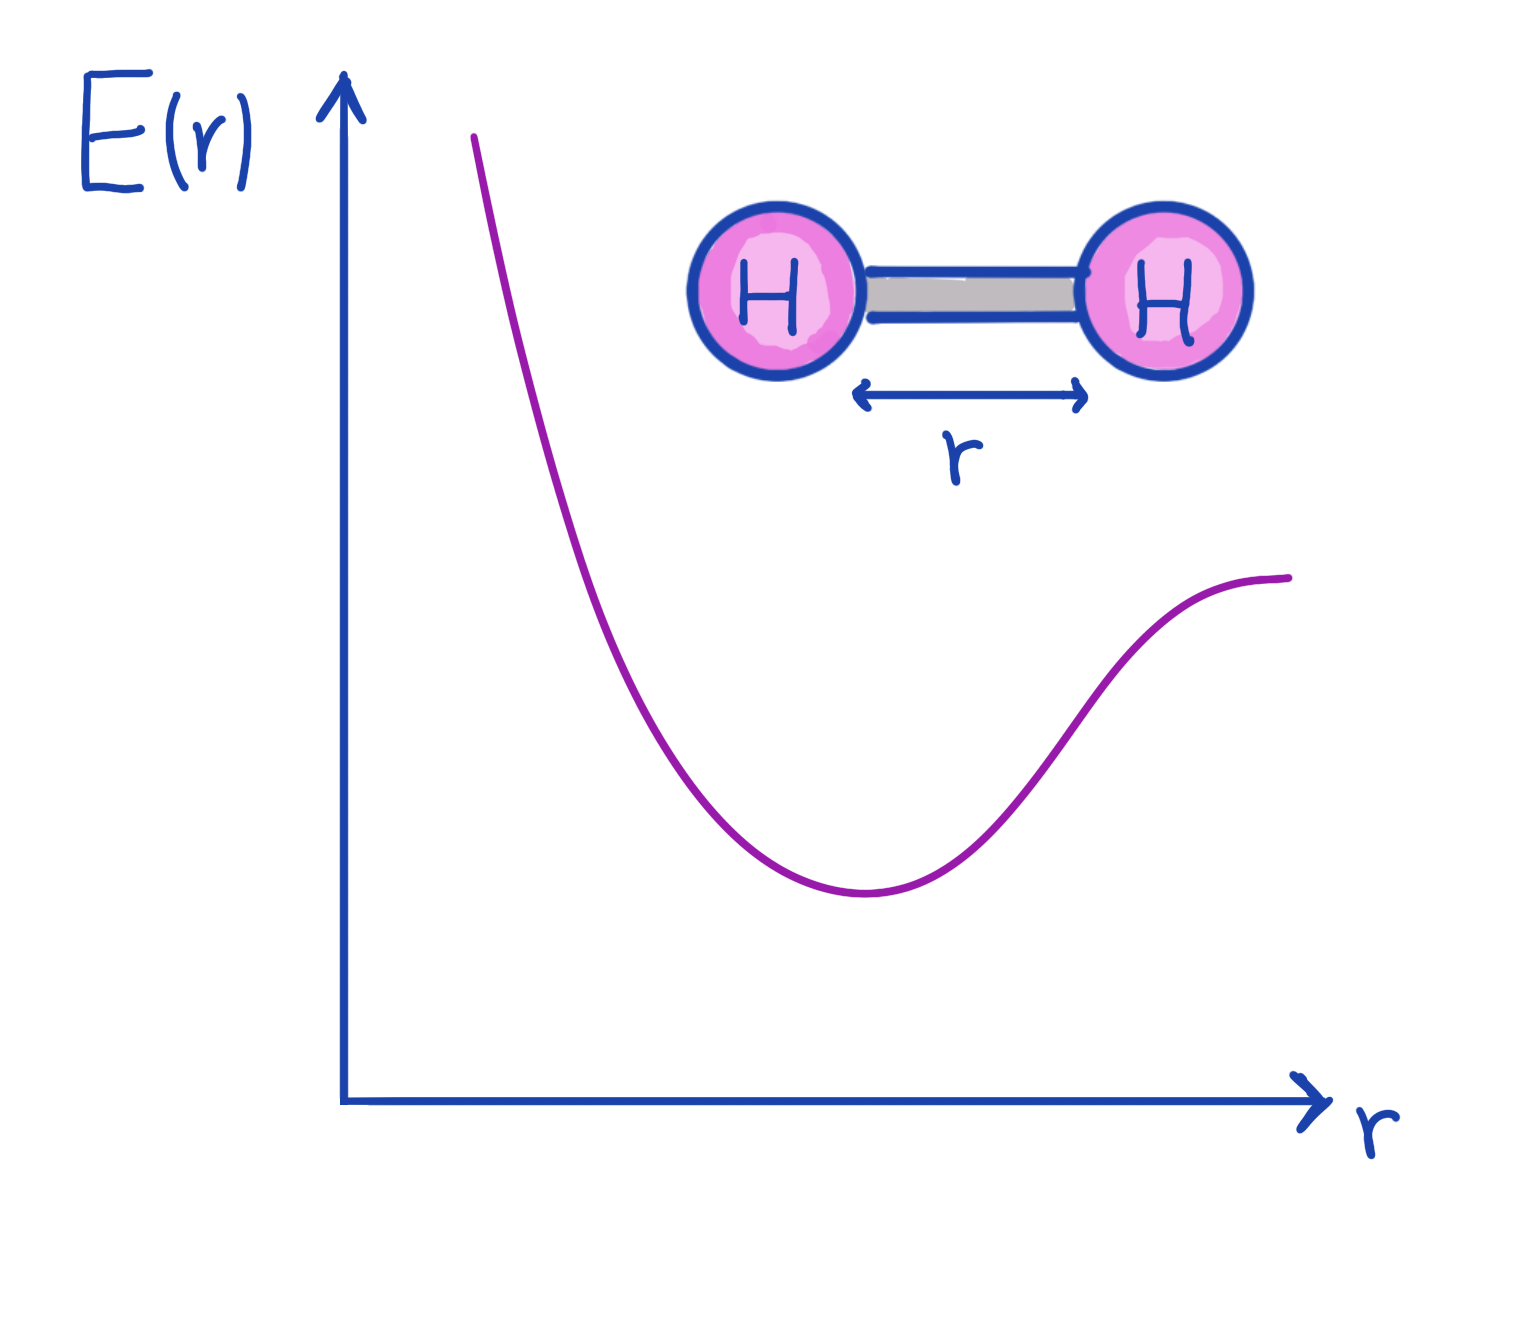

Challenge code

In the code below, you are given a few functions:

- hydrogen_hamiltonian: This function will return the qubit Hamiltonian of the hydrogen molecule, $H_{2}$, given the coordinates of both hydrogen atoms and the net molecular charge. You'll usually find $H_2$ with a charge of 0, but here we'll spice it up with a non-zero charge!

- num_electrons: In subsequent functions, wew ill need the total number of electrons in the hydrogen molecule we are looking at. With a charge of 0, $H_2$ usually has just 2 electrons, one per hydrogen atom. Given the charge, how many electrons should $H_2$ have? **You must complete this function**.

- hf: The "HF" stands for Hartree–Fock. This function's purpose is calculate the HF approximation — treat every electron as independent, electrons move under a Coulomb potential from the positively charged nuclei, and there's a mean field from the other electrons — for the ground state of the hydrogen molecule we're interested in. We'll use this later, so **you must complete this function**.

- run_VQE: This function takes the coordinates, charge, generates the HF state, defines a cost function and minimizes it. **You must complete this function** by:
    
   - defining the gates within the cost function, using the qml.AllSinglesDoubles template with singles and doubles arguments defined below; and
    
   - returning what we want to minimize, namely the expectation value of the hydrogen Hamiltonian!

Here are some helpful resources:

- [Building molecular Hamiltonians](https://pennylane.ai/qml/demos/tutorial_quantum_chemistry.html)
- [A brief overview of VQE](https://pennylane.ai/qml/demos/tutorial_vqe.html)
- [Variational Quantum Eigensolver](https://youtu.be/4Xnxa6tzPeA)
- [Quantum Chemistry documentation](https://docs.pennylane.ai/en/stable/introduction/chemistry.html)

**Input**
As input to this problem, you are given:

coordinates (list(float)): the x, y,z and  coordinates of each hydrogen atom
charge (int): the charge of the hydrogen molecule. It could be positive, negative, or zero!
Output
This code must output the ground state energy (float) of the hydrogen molecule in question.

If your solution matches the correct one within the given tolerance specified in check (in this case it's a 1e-3 relative error tolerance), the output will be "Correct!" Otherwise, you will receive a "Wrong answer" prompt.

Good luck!

Code

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

In [ ]:
def hydrogen_hamiltonian(coordinates, charge):
    """Calculates the qubit Hamiltonian of the hydrogen molecule.
    
    Args:
        coordinates (list(float)): Cartesian coordinates of each hydrogen molecule.
        charge (int): The electric charge given to the hydrogen molecule.

    Returns:
        (qml.Hamiltonian): A PennyLane Hamiltonian.
    """
    return qml.qchem.molecular_hamiltonian(
        ["H", "H"], coordinates, charge, basis="STO-3G"
    )[0]

def num_electrons(charge):
    """The total number of electrons in the hydrogen molecule.
    
    Args:
        charge (int): The electric charge given to the hydrogen molecule.

    Returns: 
        (int): The number of electrons.
    """

In [ ]:
    # Put your solution here #
    return

In [ ]:
def hf(electrons, num_qubits):
    """Calculates the Hartree-Fock state of the hydrogen molecule.
    
    Args:
        electrons (int): The number of electrons in the hydrogen molecule.
        num_qubits (int): The number of qubits needed to represent the hydrogen molecule Hamiltonian.

    Returns:
        (numpy.tensor): The HF state.
    """

In [ ]:
    # Put your solution here #
    return

In [ ]:
def run_VQE(coordinates, charge):
    """Performs a VQE routine for the given hydrogen molecule.

    Args:
        coordinates (list(float)): Cartesian coordinates of each hydrogen molecule.
        charge (int): The electric charge given to the hydrogen molecule.:

    Returns:
        (float): The expectation value of the hydrogen Hamiltonian.
    """

    hamiltonian = hydrogen_hamiltonian(np.array(coordinates), charge)

    electrons = num_electrons(charge)
    num_qubits = len(hamiltonian.wires)

    hf_state = hf(electrons, num_qubits)
    # singles and doubles are used to make the AllSinglesDoubles template
    singles, doubles = qml.qchem.excitations(electrons, num_qubits)

    dev = qml.device("default.qubit", wires=num_qubits)

    @qml.qnode(dev)
    def cost(weights):
        """A circuit with tunable parameters/weights that measures the expectation value of the hydrogen Hamiltonian.
        
        Args:
            weights (numpy.array): An array of tunable parameters.

        Returns:
            (float): The expectation value of the hydrogen Hamiltonian.
        """

In [ ]:
        # Put your solution here #
        return

In [ ]:
    np.random.seed = 1234
    weights = np.random.normal(
        0, np.pi, len(singles) + len(doubles), requires_grad=True
    )
    opt = qml.AdamOptimizer(0.5)

    for _ in range(200):
        weights = opt.step(cost, weights)

    return cost(weights)

In [ ]:
# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    coordinates, charge = json.loads(test_case_input)
    energy = run_VQE(coordinates, charge)

    return str(energy)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-3)

In [ ]:
test_cases = [['[[0.0, 0.0, -0.8, 0.0, 0.0, 0.8], -1]', '-0.53168359'], ['[[0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614], 0]', '-1.13618883']]

In [ ]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")